# Visualize cluster information per variable

Author: Javier Lopatin \
Date: 2025-11-10 \
Version: 1.0 

In [1]:
import geopandas as gpd
import rioxarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import rasterio
import pandas as pd
import numpy as np
import os

In [ ]:
# set working directory
os.chdir("/mnt/rapidita_4T/temp/Suisun/")
os.getcwd()

In [2]:
# see phenoshape interactively with tuiview
!tuiview Rasters/phenoshapeAll_masked.tif

In [3]:
# see clusters interactively with tuiview
!tuiview Rasters/kmenas_KernelPCA_clip_9.tif

In [2]:
df = pd.read_csv('data/df_r.csv')

# chamge column name kmenas_KernelPCA_clip_9 to cluster
df.rename(columns={'kmenas_KernelPCA_clip_9': 'cluster'}, inplace=True)

# Convert 'cluster' column to a categorical variable
df['cluster'] = df['cluster'].astype('category')

df.head()

,Unnamed: 0,cluster,phenoshapeAll.1,phenoshapeAll.2,phenoshapeAll.3,phenoshapeAll.4,phenoshapeAll.5,phenoshapeAll.6,phenoshapeAll.7,phenoshapeAll.8,...,ampl,ios,rog,ros,sw,rmse_all,rmse_SOS,rmse_POS,rmse_EOS,dem_10m
0,1,2,-0.195925,-0.359696,-0.195154,-0.114061,-0.055554,-0.013306,0.012064,-0.039450,...,0.740771,25.971840,0.003565,-0.000549,-2.636757,0.011224,0.009630,0.009261,0.006928,81
1,2,3,0.451512,0.451512,0.517645,0.515788,0.515871,0.551887,0.526696,0.522512,...,0.669808,138.125565,0.006062,-0.003626,-0.443147,0.012234,0.011805,0.010359,0.007038,1104
2,3,7,-0.194932,-0.055463,0.170226,0.277245,0.331107,0.294717,0.191466,0.107016,...,0.922277,94.912733,0.010295,-0.002825,-0.928005,0.010559,0.010229,0.009607,0.008034,313
3,4,5,0.854311,0.850147,1.059529,1.155224,1.214059,1.333268,1.300838,1.321596,...,1.288857,107.706817,0.005564,-0.018450,-0.726631,0.007789,0.006729,0.006625,0.005355,2792
4,5,2,0.346154,0.626670,0.239610,0.183581,0.088836,0.271195,0.277790,0.261878,...,1.107068,37.147830,0.040074,-0.003340,1.052308,0.009023,0.009023,0.007322,0.003919,-604


In [3]:
df.cluster.unique()

[2, 3, 7, 5, 8, 6, 9, 1, 4]
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]

In [4]:
# delete rows with nan values
df.dropna(inplace=True)

In [5]:
# Create a dataframe with columns containing 'DOY_'
phen = df.filter(regex='phenoshapeAll.')

# Assign the new column names to your DataFrame
phen.columns = np.linspace(1, 365, 52).astype(int).astype(str)#new_column_names

phen.head()

,1,8,15,22,29,36,43,50,58,65,...,300,307,315,322,329,336,343,350,357,365
0,-0.195925,-0.359696,-0.195154,-0.114061,-0.055554,-0.013306,0.012064,-0.039450,-0.197522,-0.209638,...,-0.388937,-0.463879,-0.515340,-0.496817,-0.408639,-0.326621,-0.241425,-0.219159,-0.012601,-0.521958
1,0.451512,0.451512,0.517645,0.515788,0.515871,0.551887,0.526696,0.522512,0.542344,0.568061,...,0.616487,0.588869,0.551402,0.541439,0.540159,0.541625,0.545162,0.549535,0.555531,0.541075
2,-0.194932,-0.055463,0.170226,0.277245,0.331107,0.294717,0.191466,0.107016,0.085800,0.108946,...,-0.031634,-0.014887,0.089264,0.089375,0.091802,0.097053,0.083579,0.042585,-0.019902,-0.064493
3,0.854311,0.850147,1.059529,1.155224,1.214059,1.333268,1.300838,1.321596,1.374350,1.403880,...,0.353216,0.345153,0.335004,0.328000,0.340079,0.374227,0.485095,0.484755,0.876420,0.266432
4,0.346154,0.626670,0.239610,0.183581,0.088836,0.271195,0.277790,0.261878,0.341087,0.391353,...,-0.305760,-0.383700,-0.444406,-0.437843,-0.480398,-0.356624,-0.204254,-0.091887,0.482312,-0.024170


Text(0, 0.5, 'EVI')

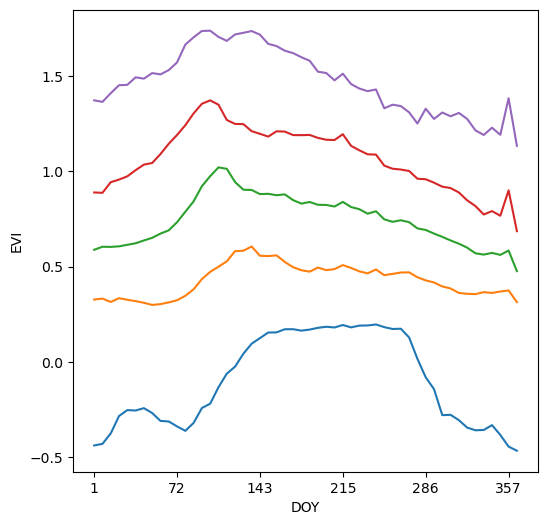

In [6]:
# plot quantiles of all phen observations
phen.quantile([0.05, 0.25, 0.5, 0.75, 0.95]).T.plot(figsize=(6, 6), legend=False)
plt.xlabel('DOY')
plt.ylabel('EVI')

In [7]:
# add cluster to phen dataframe
phen['cluster'] = df['cluster']

/tmp/ipykernel_1293454/4206075685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phen['cluster'] = df['cluster']


In [8]:
# Create a dataframe with the 'elevation' column
dem = df[['cluster', 'dem_10m']]
dem.head()

,cluster,dem_10m
0,2,81
1,3,1104
2,7,313
3,5,2792
4,2,-604


In [9]:
# LSP dataframe
LSPbands = ['sos', 'pos', 'eos', 'vsos', 'vpos', 'veos', 'los', 'msp', 'mau', 'vmsp', 'vmau', 'ampl', 'ios','rog', 'ros', 'sw']

# Create a new dataframe with the specified columns
lsp = df[LSPbands]

# load LSP metrics
lsp.columns = ['SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU',
              'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW']

#lsp['clusters'] = df['cluster']

lsp.columns

lsp.head()

,SOS,POS,EOS,vSOS,vPOS,vEOS,LOS,MSP,MAU,vMSP,vMAU,AOS,IOS,ROG,ROS,SW
0,96,174,266,-0.059243,0.218813,0.168346,170,132,223,0.151578,0.200056,0.740771,25.971840,0.003565,-0.000549,-2.636757
1,89,167,245,0.648502,1.121320,0.838494,156,125,202,0.971668,0.959083,0.669808,138.125565,0.006062,-0.003626,-0.443147
2,75,132,259,0.140508,0.727345,0.368556,184,103,195,0.336003,0.660603,0.922277,94.912733,0.010295,-0.002825,-0.928005
3,54,96,160,1.321596,1.555289,0.374516,106,75,125,1.438749,0.984462,1.288857,107.706817,0.005564,-0.018450,-0.726631
4,5,12,153,0.346154,0.626670,0.155690,148,5,82,0.346154,0.353682,1.107068,37.147830,0.040074,-0.003340,1.052308


In [10]:
# rmse dataframe
rmse = df[['rmse_all', 'rmse_SOS', 'rmse_POS', 'rmse_EOS']]

rmse.head()

,rmse_all,rmse_SOS,rmse_POS,rmse_EOS
0,0.011224,0.009630,0.009261,0.006928
1,0.012234,0.011805,0.010359,0.007038
2,0.010559,0.010229,0.009607,0.008034
3,0.007789,0.006729,0.006625,0.005355
4,0.009023,0.009023,0.007322,0.003919


In [11]:
# obtain mean and std of phenology
mean_phen = phen.dropna().groupby('cluster').mean()
std_phen  = phen.dropna().groupby('cluster').std()

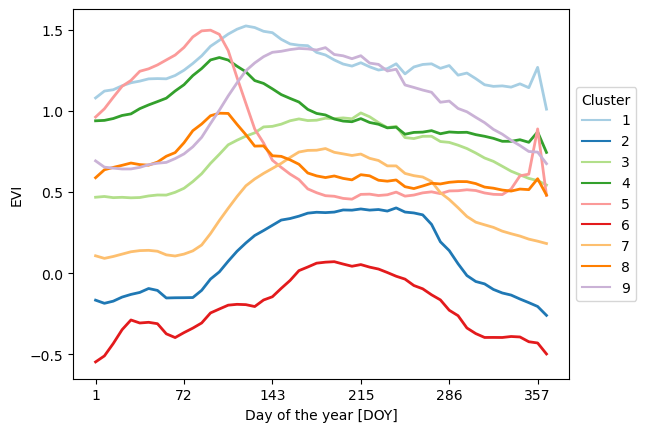

In [12]:
col = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
#['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f','#bf5b17']

ax = mean_phen.T.plot(color=col)
ax.set_xlabel("Day of the year [DOY]")
ax.set_ylabel("EVI")
# legend title
ax.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))
# wigth of lines
for line in ax.lines:
    line.set_linewidth(2)

#plt.savefig('figures/meanPhenoCluster.png', dpi=300)
#plt.savefig('figures/meanPhenoCluster.svg')

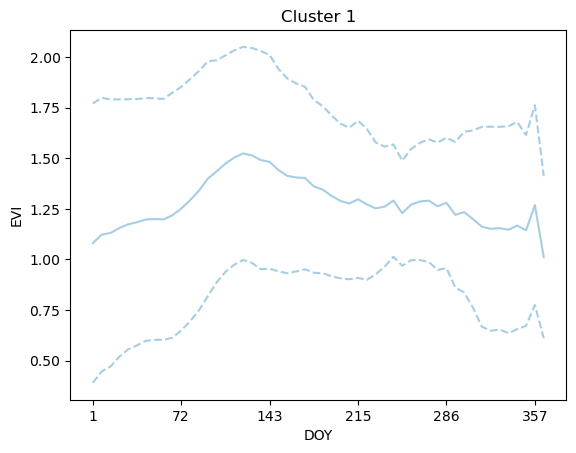

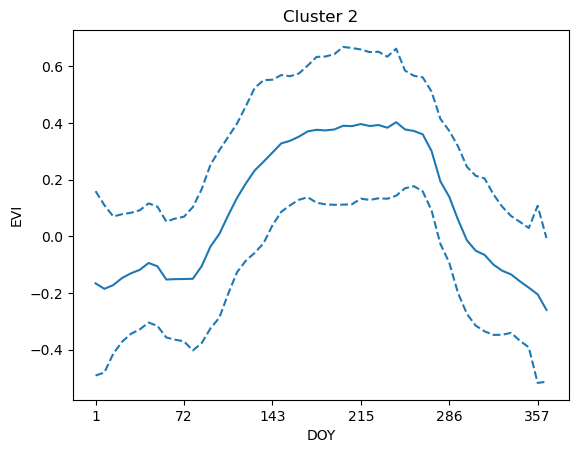

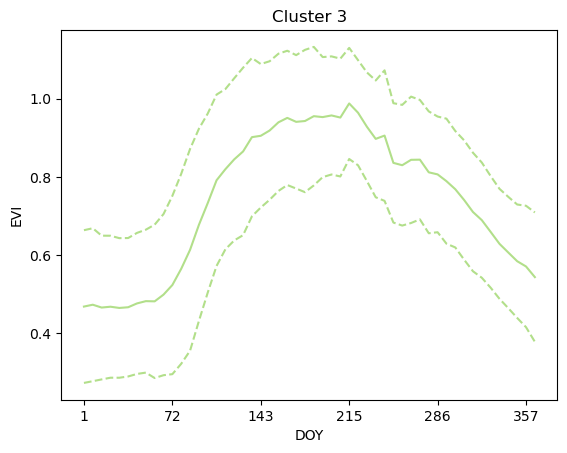

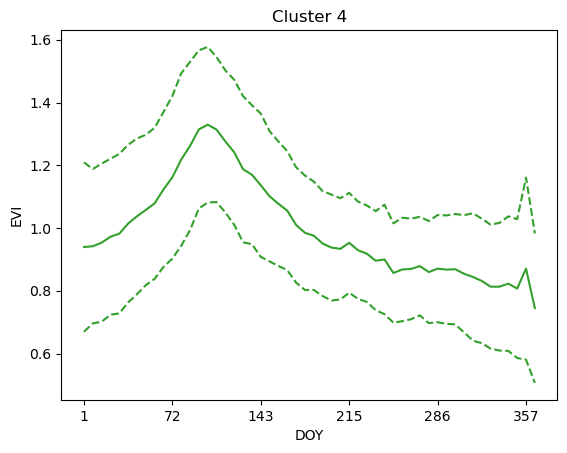

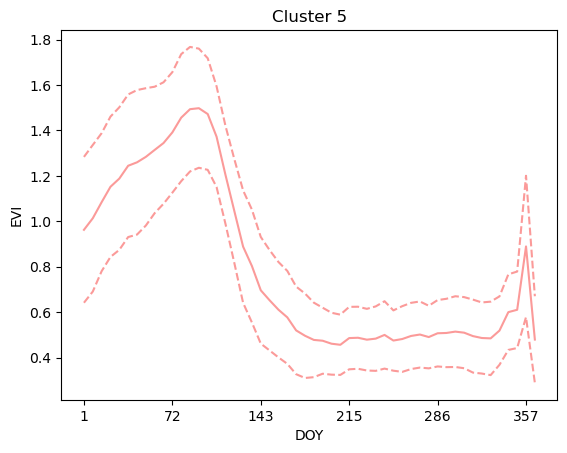

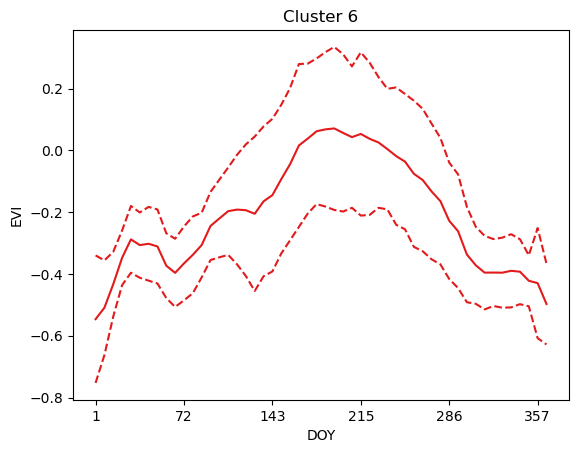

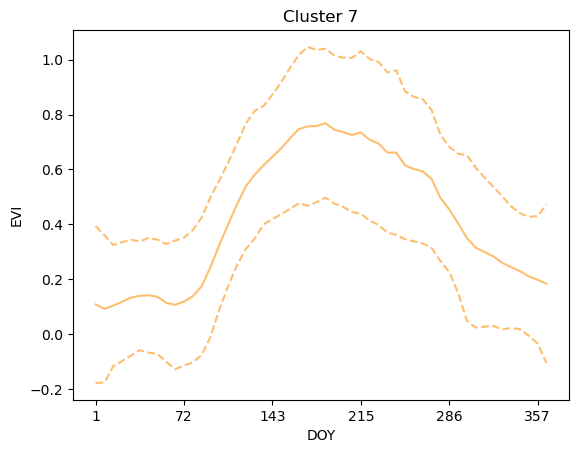

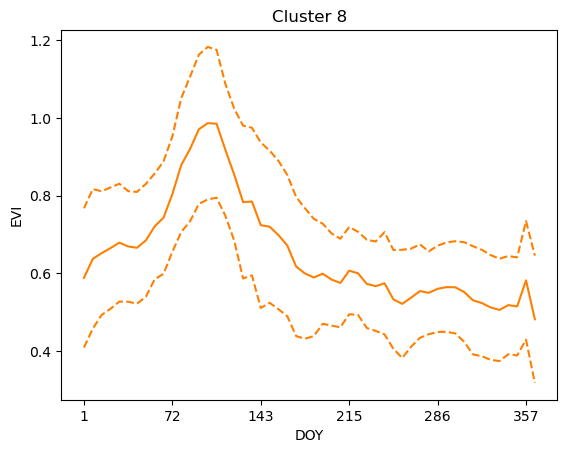

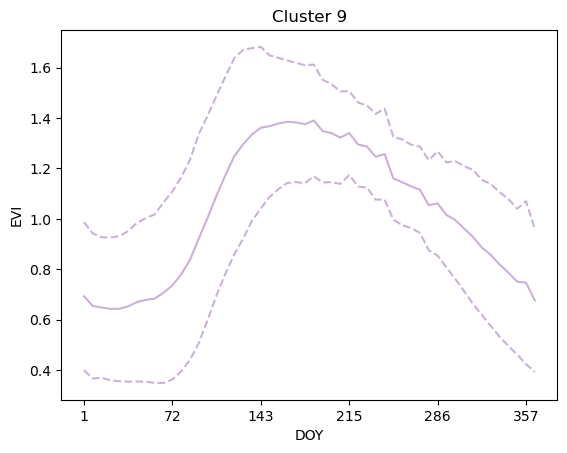

In [13]:
# 0.05, 0.5, and 0.95 quantiles per cluster
for i in range(9):
    f = pd.DataFrame([mean_phen.iloc[i,:] - std_phen.iloc[i,:],
                       mean_phen.iloc[i,:],
                       mean_phen.iloc[i,:] + std_phen.iloc[i,:]])

    ax = f.T.plot(color=col[i], legend=False, style=['--','-','--'])
    ax.set_xlabel("DOY")
    ax.set_ylabel("EVI")
    plt.title('Cluster '+str(i+1))

    #plt.savefig('figures/PhenoCluster'+str(i+1)+'_.png')

In [22]:
lsp.columns

Index(['SOS', 'POS', 'EOS', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'MSP', 'MAU',
       'vMSP', 'vMAU', 'AOS', 'IOS', 'ROG', 'ROS', 'SW'],
      dtype='object')

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


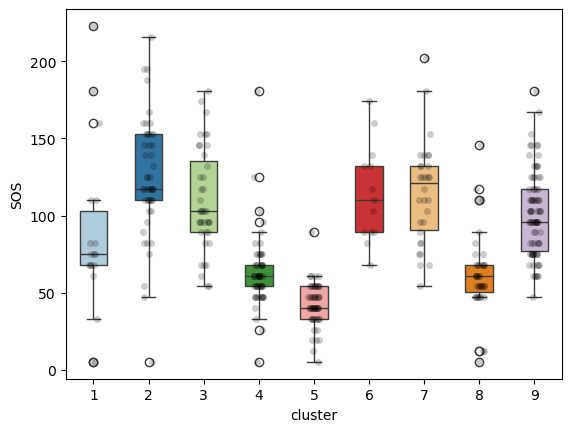

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


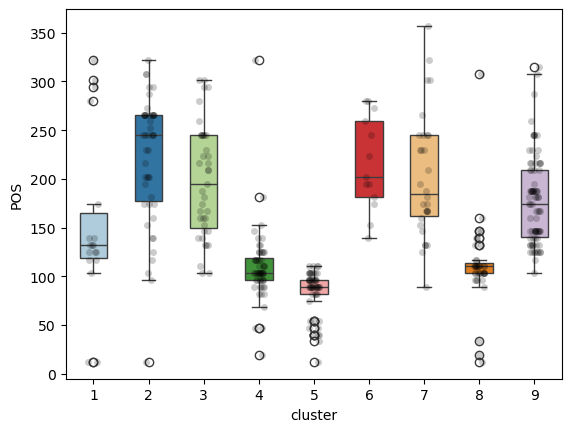

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


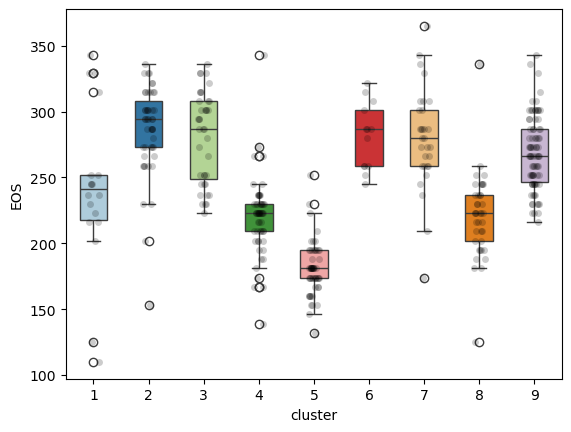

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


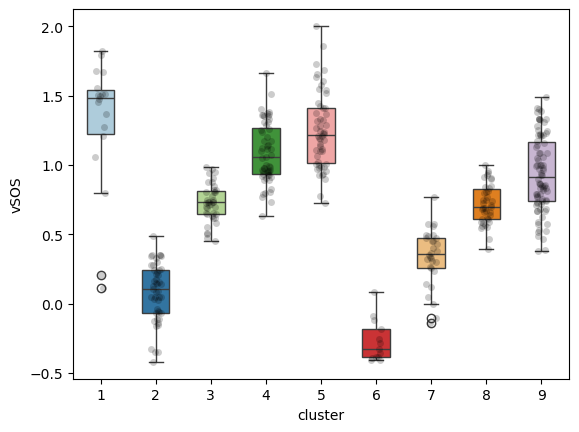

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


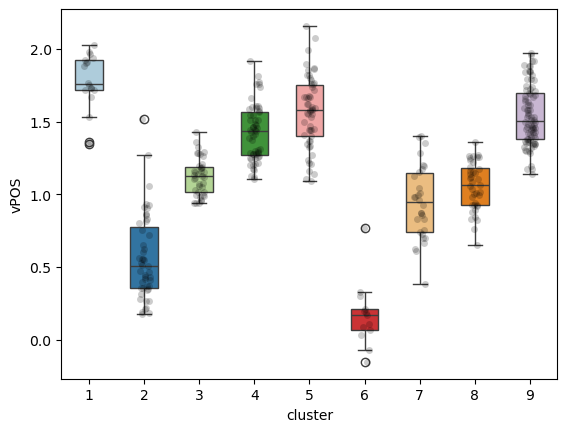

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


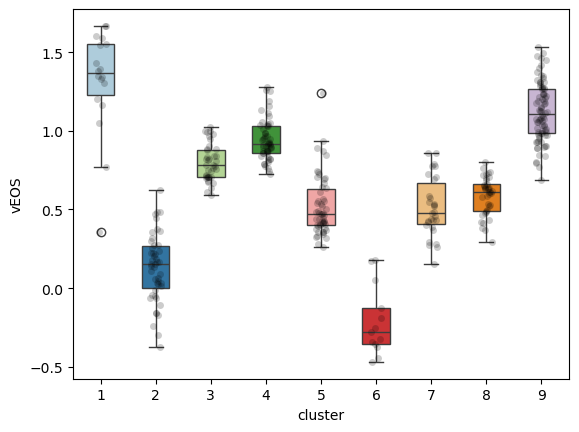

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


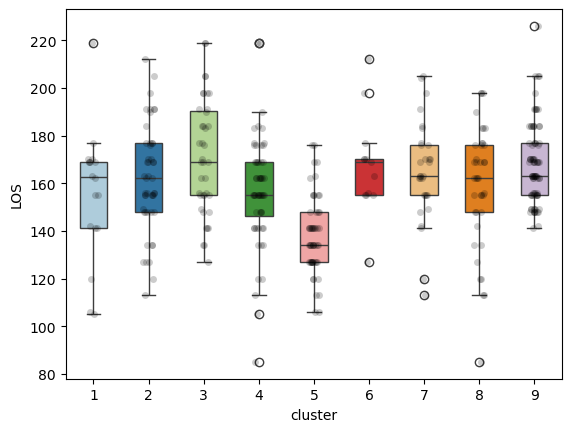

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


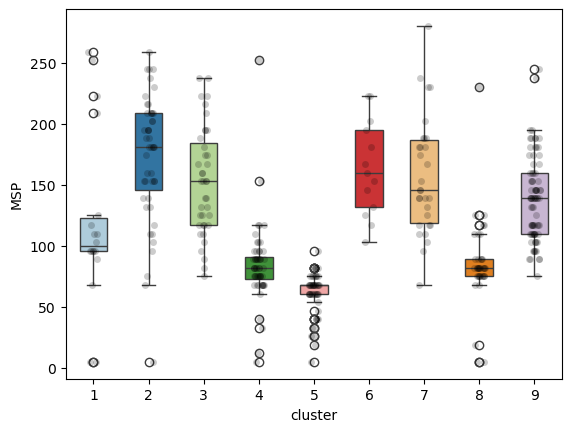

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


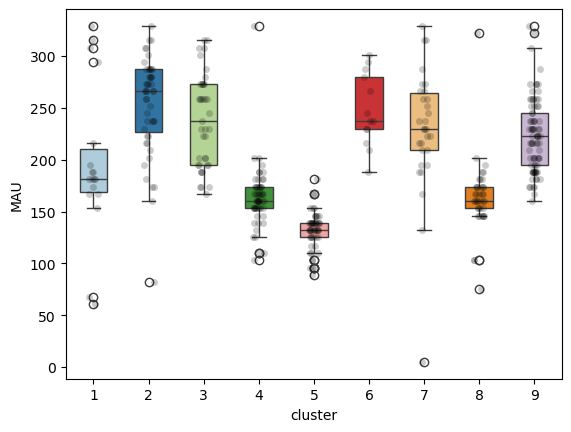

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


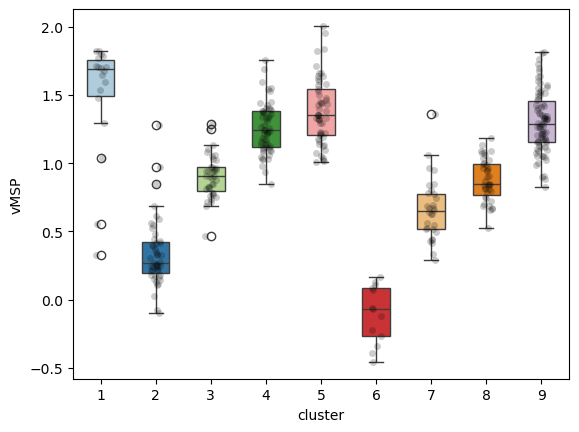

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


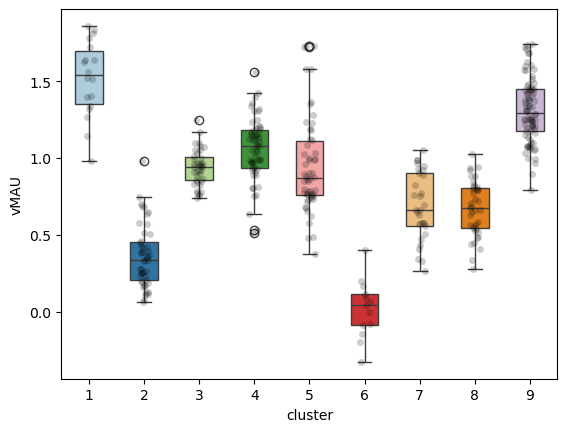

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


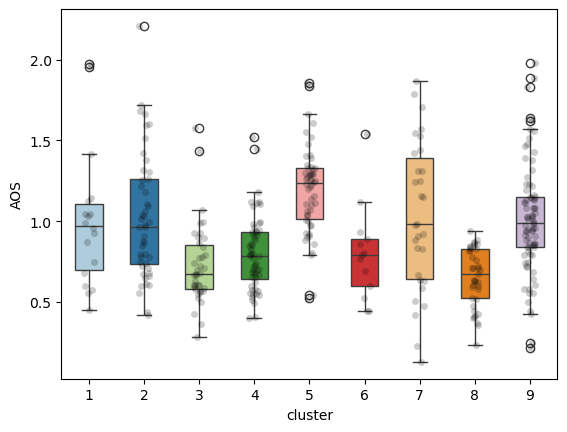

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


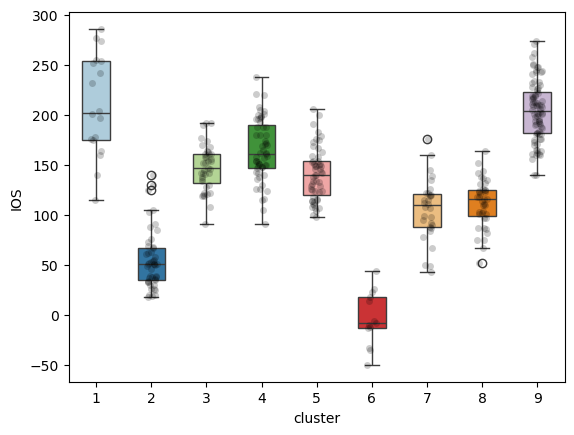

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


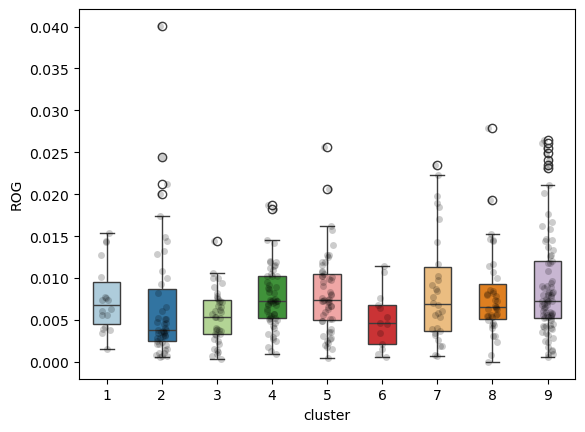

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


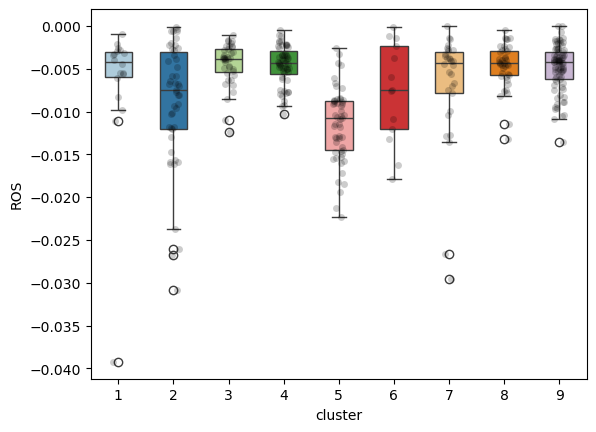

/tmp/ipykernel_1293454/1240048227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],


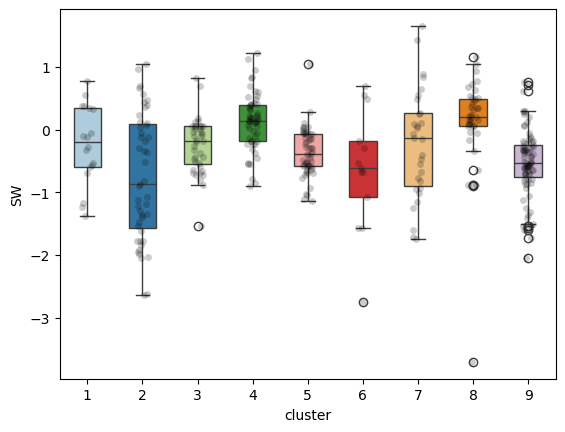

In [23]:
import seaborn as sns

for lspi in lsp.columns:
    ax = sns.boxplot(y=lsp[lspi], x=df['cluster'],
                     width=0.5,
                     palette=col)

    ax = sns.stripplot(y=lsp[lspi], x=df['cluster'], 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')
    plt.savefig('figures/boxplot_'+lspi+'.png', dpi=300)
    plt.show()



In [ ]:
import matplotlib.pyplot as plt

for lspi in lsp.columns[1:]:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create boxplot
    boxprops = dict(linewidth=1.5, color='black')
    medianprops = dict(linewidth=1.5, color='black')
    unique_clusters = df['cluster'].unique()
    box_colors = []
    for cluster in unique_clusters:
        try:
            box_colors.append(col[cluster])
        except KeyError:  # or IndexError if col is a list
            print(f"Error: Color not found for cluster {cluster}.")

    
    bp = ax.boxplot([lsp[lspi][df['cluster'] == cluster].values for cluster in unique_clusters],
                    positions=range(len(unique_clusters)),
                    patch_artist=True,
                    boxprops=boxprops,
                    medianprops=medianprops)
    
    # Color the boxes with the specified palette
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor(color)

    # Add jittered data points (stripplot)
    for i, cluster in enumerate(unique_clusters):
        y = lsp[lspi][df['cluster'] == cluster]
        x = np.random.normal(i, 0.04, size=len(y))  # Add jitter in x direction
        ax.scatter(x, y, alpha=0.2, color='black', marker='o')

    ax.set_xticks(range(len(unique_clusters)))
    ax.set_xticklabels(unique_clusters)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(lspi)
    plt.tight_layout()

    # Uncomment the next line if you want to save the figure
    #plt.savefig('figures/boxplot_'+lspi+'.png', dpi=300)
    plt.show()


In [87]:
dem

,cluster,dem_10m
0,2,81
1,3,1104
2,7,313
3,5,2792
4,2,-604
...,...,...
373,1,1904
374,9,2753
375,9,4123
376,1,2700


/tmp/ipykernel_1293454/1343200344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=dem.dem_10m, x=df['cluster'],


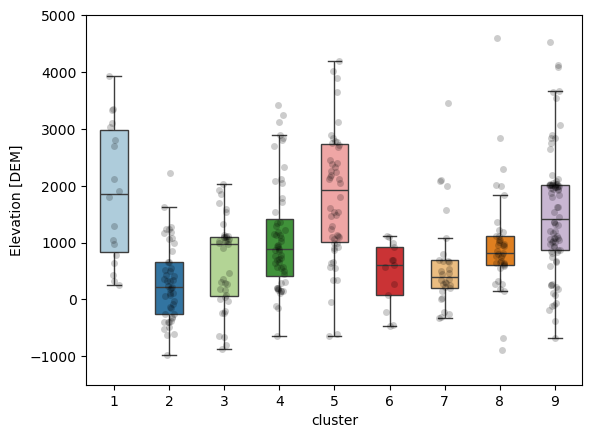

In [16]:
# sample 5000 random rows from dem
#dem_random = dem.sample(n=5000, random_state=1)

ax = sns.boxplot(y=dem.dem_10m, x=df['cluster'],
                 width=0.5,
                 palette=col,
                 showfliers = False)

ax = sns.stripplot(y=dem.dem_10m, x=df['cluster'], 
                   jitter=True, 
                   marker='o', 
                   alpha=0.2,
                   color='black').set(ylabel='Elevation [DEM]')
plt.ylim(-1500, 5000)
plt.savefig('figures/boxplot_dem_veg', dpi=300)
plt.show()

In [94]:
rmse

,rmse_all,rmse_SOS,rmse_POS,rmse_EOS
0,0.011224,0.009630,0.009261,0.006928
1,0.012234,0.011805,0.010359,0.007038
2,0.010559,0.010229,0.009607,0.008034
3,0.007789,0.006729,0.006625,0.005355
4,0.009023,0.009023,0.007322,0.003919
...,...,...,...,...
373,0.020327,0.019126,0.018655,0.016514
374,0.028300,0.028053,0.026026,0.021725
375,0.014469,0.014102,0.013598,0.012224
376,0.011470,0.010964,0.008969,0.004473


/tmp/ipykernel_1293454/4104105703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=rmse[rmsei], x=df['cluster'],


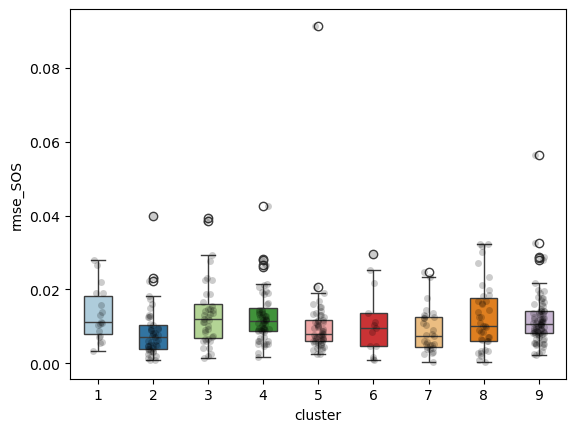

/tmp/ipykernel_1293454/4104105703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=rmse[rmsei], x=df['cluster'],


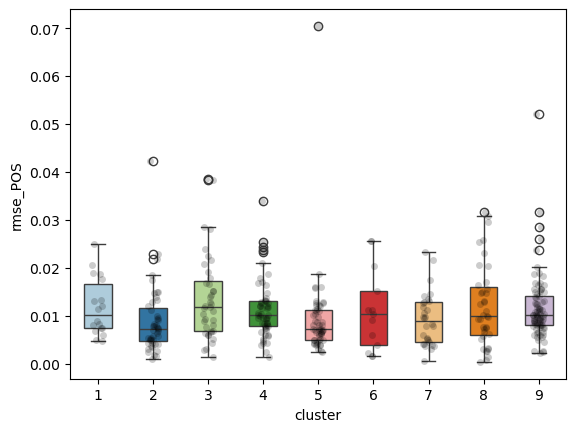

/tmp/ipykernel_1293454/4104105703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=rmse[rmsei], x=df['cluster'],


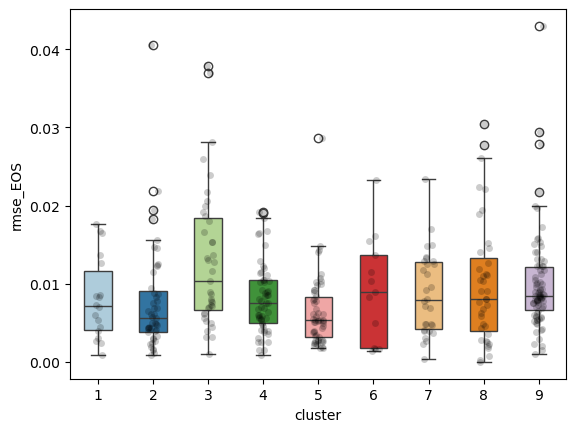

In [17]:
for rmsei in rmse.columns[1:]:
#lspi=lsp_list[0]
    ax = sns.boxplot(y=rmse[rmsei], x=df['cluster'],
                     width=0.5,
                     palette=col)

    ax = sns.stripplot(y=rmse[rmsei], x=df['cluster'], 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black')
    plt.savefig('figures/boxplot_'+rmsei+'.png', dpi=300)
    plt.show()